In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# import the data
df3 = pd.read_csv('/Users/thejason/Documents/datasets/severe weather/detail_trim3.csv')
# df2 = pd.read_csv('/Users/thejason/Documents/datasets/severe weather/detail_trim2.csv')
df = pd.read_csv('/Users/thejason/Documents/datasets/severe weather/details.csv')

/Users/thejason/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,26,27,29,30,35,36,38,40,41,43,44,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [48]:
list(df)

['Unnamed: 0',
 'BEGIN_YEARMONTH',
 'BEGIN_DAY',
 'BEGIN_TIME',
 'END_YEARMONTH',
 'END_DAY',
 'END_TIME',
 'EPISODE_ID',
 'EVENT_ID',
 'STATE',
 'STATE_FIPS',
 'YEAR',
 'MONTH_NAME',
 'EVENT_TYPE',
 'CZ_TYPE',
 'CZ_FIPS',
 'CZ_NAME',
 'WFO',
 'BEGIN_DATE_TIME',
 'CZ_TIMEZONE',
 'END_DATE_TIME',
 'INJURIES_DIRECT',
 'INJURIES_INDIRECT',
 'DEATHS_DIRECT',
 'DEATHS_INDIRECT',
 'DAMAGE_PROPERTY',
 'DAMAGE_CROPS',
 'SOURCE',
 'MAGNITUDE',
 'MAGNITUDE_TYPE',
 'FLOOD_CAUSE',
 'CATEGORY',
 'TOR_F_SCALE',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'TOR_OTHER_WFO',
 'TOR_OTHER_CZ_STATE',
 'TOR_OTHER_CZ_FIPS',
 'TOR_OTHER_CZ_NAME',
 'BEGIN_RANGE',
 'BEGIN_AZIMUTH',
 'BEGIN_LOCATION',
 'END_RANGE',
 'END_AZIMUTH',
 'END_LOCATION',
 'BEGIN_LAT',
 'BEGIN_LON',
 'END_LAT',
 'END_LON',
 'EPISODE_NARRATIVE',
 'EVENT_NARRATIVE',
 'DATA_SOURCE']

In [55]:
# create a dataset containing only rows with tornado events
df_tor = df[df['EVENT_TYPE'].str.lower().str.contains('tornado')]

# reduce dataset to relevant tornado data
df_tor = df_tor.filter(['STATE','YEAR','MONTH_NAME','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH', 'BEGIN_LAT',
                    'BEGIN_LON','END_LAT','END_LON','DAMAGE_PROPERTY','DAMAGE_CROPS'])

# create aggregate INJURIES and DEATHS columns to combine direct and indirect effects
df_tor['INJURIES'] = df['INJURIES_DIRECT'] + df['INJURIES_INDIRECT']
df_tor['DEATHS'] = df['DEATHS_DIRECT'] + df['DEATHS_INDIRECT']

# remove rows where TOR_F_SCALE is null
df_tor = df_tor[pd.notnull(df_tor['TOR_F_SCALE'])]


In [60]:
# there are two different nomenclatures for TOR_F_SCALE, we will aggregate the duplicate nomenclatures
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F0'),'TOR_F_SCALE'] = 'F0'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F1'),'TOR_F_SCALE'] = 'F1'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F2'),'TOR_F_SCALE'] = 'F2'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F3'),'TOR_F_SCALE'] = 'F3'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F4'),'TOR_F_SCALE'] = 'F4'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('F5'),'TOR_F_SCALE'] = 'F5'
df_tor.loc[df_tor['TOR_F_SCALE'].str.contains('FU'),'TOR_F_SCALE'] = 'FU'


In [61]:
df_tor['TOR_F_SCALE'].unique()

array(['F3', 'F1', 'F2', 'F0', 'F4', 'F5', 'FU'], dtype=object)

In [62]:
df_tor.describe(include='all')

,STATE,YEAR,MONTH_NAME,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAMAGE_PROPERTY,DAMAGE_CROPS,INJURIES,DEATHS
count,65894,65894.000000,65894,65894,65866.000000,65866.000000,64880.000000,64880.000000,41842.000000,41842.000000,57472,51102.0,65894.000000,65894.000000
unique,52,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,811,163.0,NaN,NaN
top,TEXAS,NaN,May,F0,NaN,NaN,NaN,NaN,NaN,NaN,25K,0.0,NaN,NaN
freq,8876,NaN,14540,28735,NaN,NaN,NaN,NaN,NaN,NaN,8652,32475.0,NaN,NaN
mean,NaN,1989.970711,NaN,NaN,3.300455,120.635213,37.103236,-94.947947,37.288032,-95.913877,NaN,NaN,1.438037,0.089310
std,NaN,18.246485,NaN,NaN,7.216102,222.349532,5.002862,40.766460,4.840107,51.453966,NaN,NaN,16.630419,1.373368
min,NaN,1950.000000,NaN,NaN,0.000000,0.000000,18.250000,-815.100000,18.280400,-815.100000,NaN,NaN,0.000000,0.000000
25%,NaN,1975.000000,NaN,NaN,0.200000,30.000000,33.250000,-98.230000,33.630000,-97.680000,NaN,NaN,0.000000,0.000000
50%,NaN,1993.000000,NaN,NaN,1.000000,50.000000,36.900000,-93.382650,37.130000,-92.570000,NaN,NaN,0.000000,0.000000
75%,NaN,2005.000000,NaN,NaN,3.660000,100.000000,40.834425,-86.830000,40.850000,-86.700000,NaN,NaN,0.000000,0.000000


In [64]:
# we will drop the rows that have NaNs in END_LAT/END_LON
df_tor = df_tor[pd.notnull(df_tor['END_LAT'])]
df_tor = df_tor[pd.notnull(df_tor['TOR_F_SCALE'])]
df_tor = df_tor[pd.notnull(df_tor['TOR_LENGTH'])]

df_tor.describe(include='all')

,STATE,YEAR,MONTH_NAME,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,DAMAGE_PROPERTY,DAMAGE_CROPS,INJURIES,DEATHS
count,41841,41841.000000,41841,41841,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,41841.000000,33454,27088,41841.000000,41841.000000
unique,52,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,792,158,NaN,NaN
top,TEXAS,NaN,May,F0,NaN,NaN,NaN,NaN,NaN,NaN,0.00K,0.00K,NaN,NaN
freq,4522,NaN,9219,18209,NaN,NaN,NaN,NaN,NaN,NaN,5346,12266,NaN,NaN
mean,NaN,1997.415191,NaN,NaN,4.799878,157.981033,37.260181,-95.797764,37.287851,-95.913371,NaN,NaN,2.000454,0.130159
std,NaN,16.870287,NaN,NaN,8.366183,261.785303,4.843241,50.319642,4.840022,51.454476,NaN,NaN,20.538464,1.707404
min,NaN,1950.000000,NaN,NaN,0.000000,0.000000,18.280000,-815.100000,18.280400,-815.100000,NaN,NaN,0.000000,0.000000
25%,NaN,1990.000000,NaN,NaN,0.500000,33.000000,33.600000,-97.726000,33.630000,-97.680000,NaN,NaN,0.000000,0.000000
50%,NaN,2003.000000,NaN,NaN,2.180000,67.000000,37.100000,-92.630000,37.130000,-92.570000,NaN,NaN,0.000000,0.000000
75%,NaN,2010.000000,NaN,NaN,6.000000,150.000000,40.820000,-86.770000,40.850000,-86.700000,NaN,NaN,0.000000,0.000000


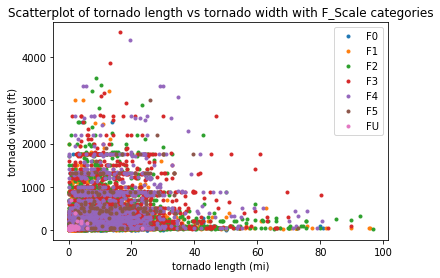

In [84]:
df_tor_short = df_tor[df_tor['TOR_LENGTH']<100]
groups = df_tor_short.groupby('TOR_F_SCALE')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.TOR_LENGTH, group.TOR_WIDTH, marker='o', linestyle='', ms=3, label=name)
ax.legend()
plt.xlabel('tornado length (mi)')
plt.ylabel('tornado width (ft)')
plt.title('Scatterplot of tornado length vs tornado width with F_Scale categories')
plt.show()

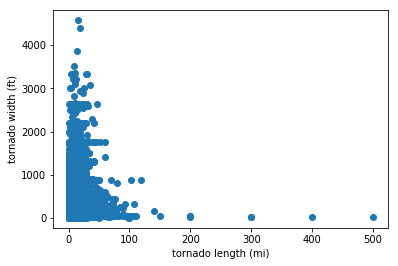

In [67]:
plt.scatter(df_tor['TOR_LENGTH'],df_tor['TOR_WIDTH'])
plt.xlabel('tornado length (mi)')
plt.ylabel('tornado width (ft)')
plt.show()

In [79]:
from geopy.distance import vincenty

df_tor['MILES'] = df_tor.apply(
    (lambda row: vincenty(
        (row['BEGIN_LAT'], row['BEGIN_LON']),
        (row['END_LAT'], row['END_LON'])
    ).miles),axis=1)

df_tor = df_tor.drop(['BEGIN_LAT','BEGIN_LON','END_LAT','END_LON'],axis=1)

In [9]:
df_tor.groupby(['TOR_F_SCALE']).sum()

,YEAR,TOR_LENGTH,TOR_WIDTH,INJURIES,DEATHS,MILES
TOR_F_SCALE,,,,,,
EF0,16024687,11344.57,551095.77,163,4,11073.919757
EF1,10165000,18984.66,1058839.34,795,41,18796.144024
EF2,3007372,10190.02,655616.00,2220,130,10118.527867
EF3,874858,4686.66,352672.00,3904,306,4656.516077
EF4,207167,1484.48,107857.80,4292,320,1488.572390
EF5,28149,243.27,21435.00,1725,315,232.198070
EFU,197635,115.89,6168.00,0,0,112.517725
F0,20482313,18241.63,497019.40,235,6,84528.509717
F1,14909389,43016.11,891898.60,3240,112,121400.451879


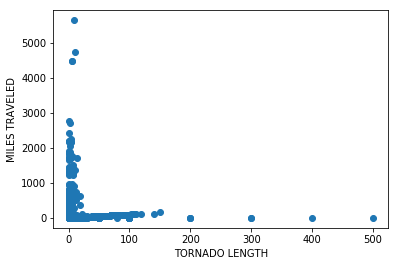

In [10]:
plt.scatter(df_tor['TOR_LENGTH'],df_tor['MILES'])
plt.ylabel('MILES TRAVELED')
plt.xlabel('TORNADO LENGTH')
plt.show()

In [82]:
df_tor[df_tor['MILES']>1000].head(20)

,STATE,YEAR,MONTH_NAME,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,DAMAGE_PROPERTY,DAMAGE_CROPS,INJURIES,DEATHS,MILES
289812,WASHINGTON,1997,July,F1,5.0,100.0,10K,0,0,0,4473.720445
289813,WASHINGTON,1997,July,F1,5.0,100.0,10K,0,0,0,4473.720445
304529,CALIFORNIA,1997,May,F1,9.0,40.0,NaN,0,0,0,5637.989158
436202,PENNSYLVANIA,2000,June,F1,14.0,100.0,NaN,NaN,0,0,1702.105786
436973,PENNSYLVANIA,2000,June,F0,2.0,100.0,NaN,NaN,0,0,1686.245974
448749,VIRGINIA,2000,April,F1,0.7,100.0,15K,NaN,0,0,1307.065109
451133,MARYLAND,2000,May,F1,5.0,75.0,250K,NaN,0,0,1780.140484
452209,MARYLAND,2000,June,F1,1.0,30.0,250K,NaN,0,0,1442.467703
452214,MARYLAND,2000,June,F1,1.0,150.0,150K,NaN,0,0,1748.005623
486309,NORTH CAROLINA,2001,May,F0,0.5,50.0,5K,NaN,0,0,2418.881260


In [31]:
df_tor['TOR_F_SCALE'].unique()

array(['F3', 'F1', 'F2', 'F0', 'F4', 'F5', 'EF0', 'EF2', 'EF1', 'EF3',
       'EF4', 'EF5', 'EFU'], dtype=object)

In [78]:
list(df_tor)

['STATE',
 'YEAR',
 'MONTH_NAME',
 'TOR_F_SCALE',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'BEGIN_LAT',
 'BEGIN_LON',
 'END_LAT',
 'END_LON',
 'DAMAGE_PROPERTY',
 'DAMAGE_CROPS',
 'INJURIES',
 'DEATHS']

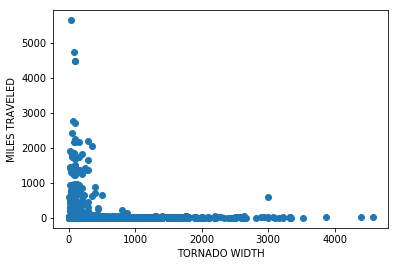

In [11]:
plt.scatter(df_tor['TOR_WIDTH'],df_tor['MILES'])
plt.ylabel('MILES TRAVELED')
plt.xlabel('TORNADO WIDTH')
plt.show()

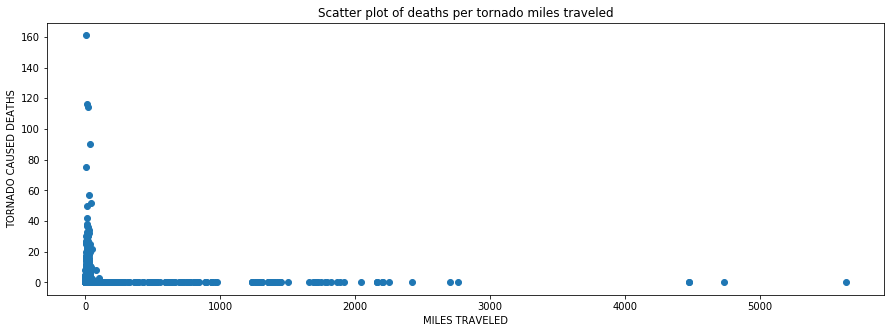

In [89]:
plt.figure(figsize=(15,5))
plt.scatter(df_tor['MILES'],df_tor['DEATHS'])
plt.xlabel('MILES TRAVELED')
plt.ylabel('TORNADO CAUSED DEATHS')
plt.title('Scatter plot of deaths per tornado miles traveled')
plt.show()

In [83]:
df_tor[df_tor['MILES']>1000]

,STATE,YEAR,MONTH_NAME,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,DAMAGE_PROPERTY,DAMAGE_CROPS,INJURIES,DEATHS,MILES
289812,WASHINGTON,1997,July,F1,5.0,100.0,10K,0,0,0,4473.720445
289813,WASHINGTON,1997,July,F1,5.0,100.0,10K,0,0,0,4473.720445
304529,CALIFORNIA,1997,May,F1,9.0,40.0,NaN,0,0,0,5637.989158
436202,PENNSYLVANIA,2000,June,F1,14.0,100.0,NaN,NaN,0,0,1702.105786
436973,PENNSYLVANIA,2000,June,F0,2.0,100.0,NaN,NaN,0,0,1686.245974
448749,VIRGINIA,2000,April,F1,0.7,100.0,15K,NaN,0,0,1307.065109
451133,MARYLAND,2000,May,F1,5.0,75.0,250K,NaN,0,0,1780.140484
452209,MARYLAND,2000,June,F1,1.0,30.0,250K,NaN,0,0,1442.467703
452214,MARYLAND,2000,June,F1,1.0,150.0,150K,NaN,0,0,1748.005623
486309,NORTH CAROLINA,2001,May,F0,0.5,50.0,5K,NaN,0,0,2418.881260


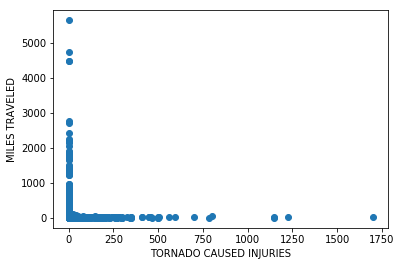

In [13]:
plt.scatter(df_tor['INJURIES'],df_tor['MILES'])
plt.ylabel('MILES TRAVELED')
plt.xlabel('TORNADO CAUSED INJURIES')
plt.show()

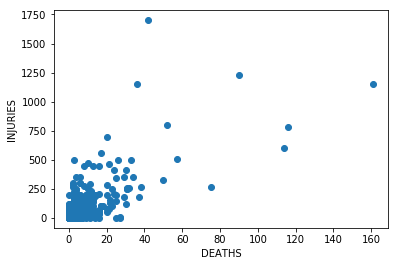

In [14]:
plt.scatter(df_tor['DEATHS'],df_tor['INJURIES'])
plt.ylabel('INJURIES')
plt.xlabel('DEATHS')
plt.show()

In [15]:
df = df.drop(['EPISODE_ID','EVENT_ID','STATE_FIPS','CZ_TYPE','CZ_FIPS','CZ_NAME','WFO','CZ_TIMEZONE','SOURCE',
              'MAGNITUDE','MAGNITUDE_TYPE','CATEGORY','FLOOD_CAUSE','TOR_F_SCALE','TOR_LENGTH'],axis=1)

In [16]:
df.describe(include='all')

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,STATE,YEAR,MONTH_NAME,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
count,1.471788e+06,1.471788e+06,1.471788e+06,1.471788e+06,1.471788e+06,1.471788e+06,1.471788e+06,1471787,1.471788e+06,1471788,...,793316.000000,561892,786522,910254.000000,910254.000000,732764.000000,732765.000000,992680,674302,1471788
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,NaN,12,...,NaN,23,48231,NaN,NaN,NaN,NaN,181326,569067,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TEXAS,NaN,June,...,NaN,N,COUNTYWIDE,NaN,NaN,NaN,NaN,A strong upper-level disturbance passed throug...,Trees down.,CSV
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121399,NaN,227634,...,NaN,127221,19717,NaN,NaN,NaN,NaN,294,1444,736672
mean,2.489395e+04,2.003249e+05,1.500403e+01,1.328537e+03,2.003249e+05,1.633736e+01,1.486984e+03,NaN,2.003189e+03,NaN,...,2.296117,NaN,NaN,37.839175,-92.660760,37.900087,-92.801525,NaN,NaN,NaN
std,1.825972e+04,1.148435e+03,9.094408e+00,6.665920e+02,1.148436e+03,9.103362e+00,6.031348e+02,NaN,1.148443e+01,NaN,...,4.707931,NaN,NaN,4.897403,35.071549,4.922416,38.668915,NaN,NaN,NaN
min,0.000000e+00,1.950010e+05,1.000000e+00,0.000000e+00,1.950010e+05,1.000000e+00,0.000000e+00,NaN,1.950000e+03,NaN,...,0.000000,NaN,NaN,-14.400000,-815.100000,-14.456000,-815.100000,NaN,NaN,NaN
25%,7.902000e+03,1.998110e+05,7.000000e+00,9.000000e+02,1.998110e+05,8.000000e+00,1.200000e+03,NaN,1.998000e+03,NaN,...,0.000000,NaN,NaN,34.380000,-97.600000,34.553850,-97.488100,NaN,NaN,NaN
50%,2.289300e+04,2.006020e+05,1.500000e+01,1.520000e+03,2.006020e+05,1.600000e+01,1.615000e+03,NaN,2.006000e+03,NaN,...,1.000000,NaN,NaN,37.980000,-91.580000,38.037400,-91.099100,NaN,NaN,NaN
75%,3.961800e+04,2.011080e+05,2.300000e+01,1.822000e+03,2.011080e+05,2.400000e+01,1.910000e+03,NaN,2.011000e+03,NaN,...,3.000000,NaN,NaN,41.350000,-83.720000,41.380000,-83.292100,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

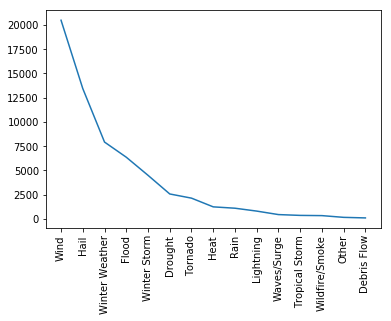

In [17]:
df3.EVENT_REDUCED.value_counts()
plt.plot(df3.EVENT_REDUCED.value_counts())
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

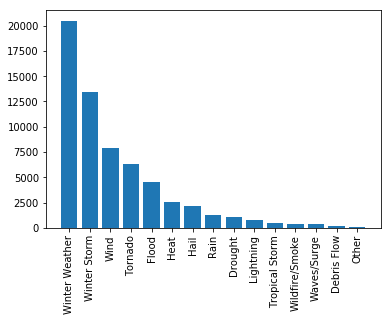

In [18]:
plt.bar(df3.EVENT_REDUCED.unique(),df3.EVENT_REDUCED.value_counts())
plt.xticks(rotation=90)

In [19]:
wind_df = df3[df3['EVENT_REDUCED']=='Wind']

In [20]:
wind_data = df3.STATE[df3['EVENT_REDUCED']=='Wind'].value_counts()
print(wind_data)

TEXAS                   1103
KANSAS                   822
ILLINOIS                 690
GEORGIA                  687
PENNSYLVANIA             677
NORTH CAROLINA           664
IOWA                     652
TENNESSEE                650
KENTUCKY                 647
OHIO                     636
OKLAHOMA                 622
MISSOURI                 597
NEW YORK                 596
VIRGINIA                 593
SOUTH CAROLINA           530
ALABAMA                  511
MISSISSIPPI              503
INDIANA                  492
ARKANSAS                 485
WISCONSIN                476
MONTANA                  434
NEBRASKA                 433
MINNESOTA                424
SOUTH DAKOTA             418
MICHIGAN                 416
GULF OF MEXICO           401
FLORIDA                  401
ATLANTIC NORTH           353
WYOMING                  345
NEW JERSEY               309
                        ... 
MASSACHUSETTS            252
COLORADO                 214
MAINE                    187
ATLANTIC SOUTH

In [21]:
event_data = df3.STATE.value_counts()

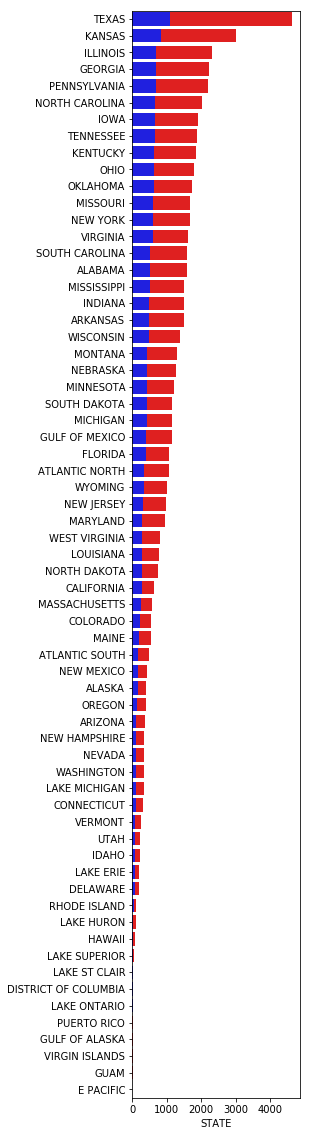

In [22]:
plt.figure(figsize=(3,20))
sns.barplot(event_data,event_data.index, color='red')
sns.barplot(wind_data,wind_data.index, color='blue')
plt.show()

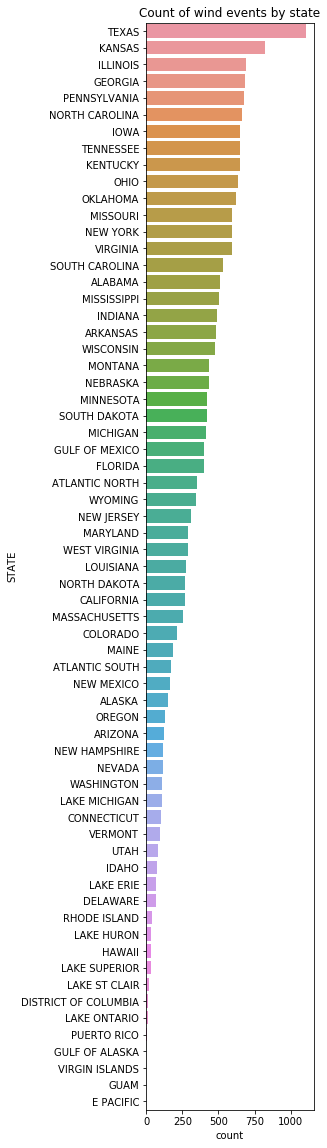

In [23]:
# set the figure size so it shows all the y labels with sufficient room
plt.figure(figsize=(3,20))
# do the countplot of wind event by state
sns.countplot(y='STATE',data=wind_df,order = wind_df['STATE'].value_counts().index)
# set title
plt.title('Count of wind events by state')
# plot
plt.show()

In [24]:
a = df3.groupby(['STATE','EVENT_REDUCED']).agg(len)
a

BEGIN_DATE_TIME  END_DATE_TIME  YEAR  \
STATE          EVENT_REDUCED                                          
ALABAMA        Drought                      87             87    87   
               Flood                       126            126   126   
               Hail                        284            284   284   
               Heat                         31             31    31   
               Lightning                    31             31    31   
               Other                         2              2     2   
               Rain                          9              9     9   
               Tornado                      85             85    85   
               Tropical Storm               15             15    15   
               Waves/Surge                   2              2     2   
               Wildfire/Smoke                1              1     1   
               Wind                        511            511   511   
               Winter Storm                 19             19    19   
               Winter Weather               62             62    62   
ALASKA         Debris Flow                   5              5     5   
               Flood                        18             18    18   
               Hail                          1              1     1   
               Heat                          1              1     1   
               Other                         1              1     1   
               Tornado                       1              1     1   
               Waves/Surge                   4              4     4   
               Wildfire/Smoke                1              1     1   
               Wind                        154            154   154   
               Winter Storm                 97             97    97   
               Winter Weather               54             54    54   
AMERICAN SAMOA Flood                         3              3     3   
               Other                         1              1     1   
               Rain                          2              2     2   
               Tropical Storm                2              2     2   
               Waves/Surge                   7              7     7   
...                                        ...            ...   ...   
WEST VIRGINIA  Heat                         47             47    47   
               Lightning                     4              4     4   
               Rain                         22             22    22   
               Tornado                      10             10    10   
               Wildfire/Smoke                2              2     2   
               Wind                        286            286   286   
               Winter Storm                 61             61    61   
               Winter Weather              282            282   282   
WISCONSIN      Drought                      51             51    51   
               Flood                        77             77    77   
               Hail                        277            277   277   
               Heat                         42             42    42   
               Lightning                    29             29    29   
               Rain                         19             19    19   
               Tornado                      46             46    46   
               Waves/Surge                   1              1     1   
               Wildfire/Smoke                1              1     1   
               Wind                        476            476   476   
               Winter Storm                136            136   136   
               Winter Weather              339            339   339   
WYOMING        Debris Flow                   4              4     4   
               Flood                        17             17    17   
               Hail                        132            132   132   
               Lightning                     5         

In [25]:
df3.describe(include='all')

,BEGIN_DATE_TIME,END_DATE_TIME,YEAR,MONTH_NAME,BEGIN_DAY,BEGIN_TIME,EPISODE_ID,EVENT_ID,STATE,CZ_TYPE,...,EVENT_REDUCED,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,BEGIN_LAT,BEGIN_LON
count,61977,61977,61977.000000,61977,61977.000000,61977.000000,6.197700e+04,6.197700e+04,61977,61977,...,61977,61977,61977.000000,61977.000000,61977.000000,61977.000000,3.715100e+04,3.156400e+04,36059.000000,36059.000000
unique,52412,51912,NaN,12,NaN,NaN,NaN,NaN,68,3,...,15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01-AUG-12 00:00:00,31-JUL-12 23:59:00,NaN,June,NaN,NaN,NaN,NaN,TEXAS,C,...,Wind,CST-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,67,63,NaN,8945,NaN,NaN,NaN,NaN,4628,37896,...,20493,16698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.078852,NaN,14.974313,1287.645643,6.769636e+05,2.609061e+06,NaN,NaN,...,NaN,NaN,0.070494,0.007583,0.009810,0.001791,4.565643e+05,8.004797e+04,37.884166,-92.929236
std,NaN,NaN,6.170078,NaN,9.154585,680.875776,7.573889e+05,2.529881e+06,NaN,NaN,...,NaN,NaN,3.587114,0.407241,0.229421,0.057765,1.901692e+07,1.712488e+06,4.896498,39.694402
min,NaN,NaN,1996.000000,NaN,1.000000,0.000000,7.000000e+00,5.000000e+00,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,13.467100,-815.100000
25%,NaN,NaN,2002.000000,NaN,7.000000,800.000000,5.458100e+04,3.296450e+05,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,34.540550,-97.510250
50%,NaN,NaN,2008.000000,NaN,15.000000,1500.000000,1.089390e+05,6.533670e+05,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,38.000000,-91.100000
75%,NaN,NaN,2012.000000,NaN,23.000000,1810.000000,1.171496e+06,5.414975e+06,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,5.000000e+03,0.000000e+00,41.370000,-83.250000


In [26]:
df_pivot = df3.groupby(['STATE','YEAR'])['DAMAGE_PROPERTY'].count()
print(df_pivot)

STATE      YEAR
ALABAMA    1996     47
           1997     30
           1998     39
           1999     33
           2000     36
           2001     42
           2002     30
           2003     36
           2004     17
           2005     32
           2006     25
           2007     48
           2008     59
           2009     72
           2010     56
           2011    136
           2012     82
           2013     52
           2014     34
           2015     39
           2016     46
           2017     52
ALASKA     1996      4
           1997      1
           1998      1
           1999      2
           2000      1
           2001      1
           2002      2
           2003      4
                  ... 
WISCONSIN  2010     56
           2011     57
           2012     41
           2013     45
           2014     40
           2015     30
           2016     70
           2017     54
WYOMING    1996      6
           1997      3
           1998     10
           1999   

In [27]:
weather_by_year = pd.pivot_table(df3, index = ['YEAR'], columns = ['EVENT_REDUCED'], values = ['INJURIES_INDIRECT'], aggfunc=np.sum)
# weather_by_month = weather_by_month.reindex(['January', 'February','March','April','May','June','July','August','September','October','November','December'])


In [28]:
print(weather_by_year)

              INJURIES_INDIRECT                                                \
EVENT_REDUCED       Debris Flow Drought Flood Hail Heat Lightning Other  Rain   
YEAR                                                                            
1996                        0.0     0.0   0.0  0.0  0.0       0.0   NaN   0.0   
1997                        NaN     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
1998                        NaN     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
1999                        NaN     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2000                        0.0     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2001                        0.0     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2002                        0.0     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2003                        0.0     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2004                        0.0     0.0   0.0  0.0  0.0       0.0   0.0   0.0   
2005                        

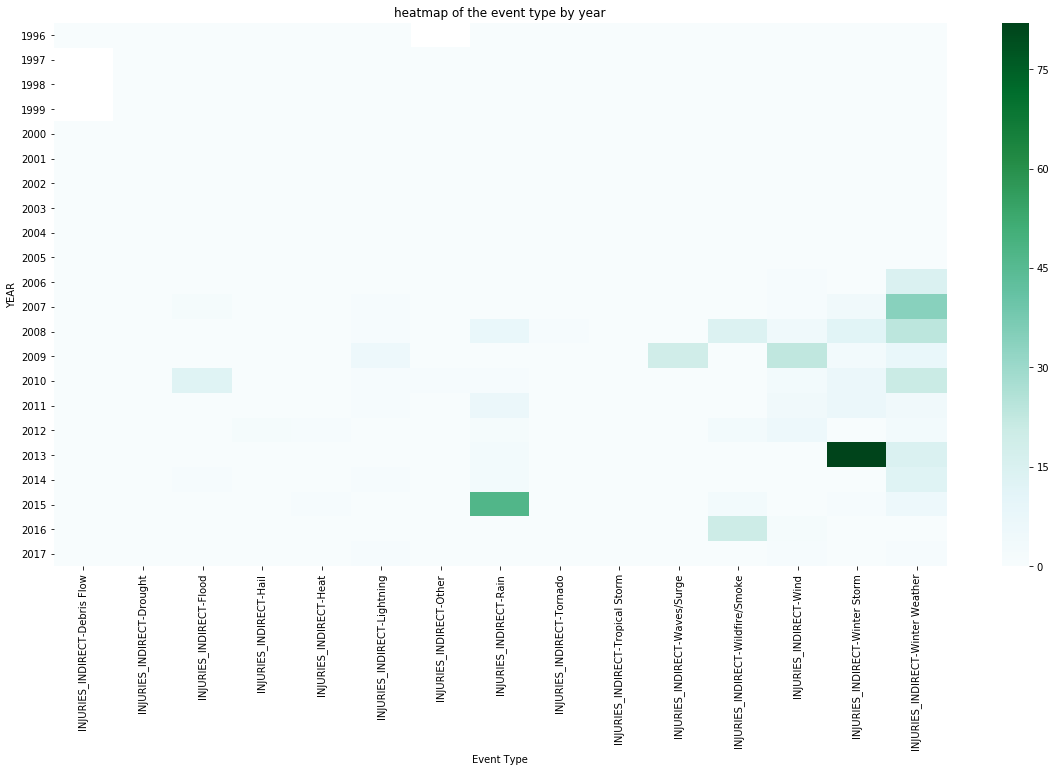

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(weather_by_year, cmap="BuGn")
plt.title('heatmap of the event type by year')
plt.xlabel('Event Type')
plt.show()